In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the first CSV file (account data)
accounts_df = pd.read_csv('sample/accounts.csv')

# Load the second CSV file (transaction data)
transactions_df = pd.read_csv('sample/transactions.csv')

# Convert tran_timestamp to datetime for better handling
transactions_df['tran_timestamp'] = pd.to_datetime(transactions_df['tran_timestamp'])

# Function to update initial_deposit based on transactions
def update_initial_deposit(accounts_df, transactions_df):
    for index, transaction in transactions_df.iterrows():
        orig_acct = transaction['orig_acct']
        bene_acct = transaction['bene_acct']
        base_amt = transaction['base_amt']
        tx_type = transaction['tx_type']

        # Update the originator's account
        if orig_acct in accounts_df['acct_id'].values:
            if tx_type == 'TRANSFER' or tx_type == 'WITHDRAWAL':
                accounts_df.loc[accounts_df['acct_id'] == orig_acct, 'initial_deposit'] -= base_amt
            elif tx_type == 'DEPOSIT':
                accounts_df.loc[accounts_df['acct_id'] == orig_acct, 'initial_deposit'] += base_amt

        # Update the beneficiary's account
        if bene_acct in accounts_df['acct_id'].values:
            if tx_type == 'TRANSFER' or tx_type == 'DEPOSIT':
                accounts_df.loc[accounts_df['acct_id'] == bene_acct, 'initial_deposit'] += base_amt
            elif tx_type == 'WITHDRAWAL':
                accounts_df.loc[accounts_df['acct_id'] == bene_acct, 'initial_deposit'] -= base_amt

    return accounts_df

# Update the initial_deposit for all accounts based on transactions
updated_accounts_df = update_initial_deposit(accounts_df, transactions_df)

# Save the updated DataFrame to a new CSV file (optional)
updated_accounts_df.to_csv('updated_accounts.csv', index=False)

# Display the updated DataFrame
print(updated_accounts_df.head())

   acct_id dsply_nm type acct_stat acct_rptng_crncy  prior_sar_count  \
0        0      C_0    I         A              USD            False   
1        1      C_1    I         A              USD            False   
2        2      C_2    I         A              USD            False   
3        3      C_3    I         A              USD            False   
4        4      C_4    I         A              USD            False   

   branch_id  open_dt  close_dt  initial_deposit  ...  \
0          1        0   1000000             0.89  ...   
1          1        0   1000000         55563.26  ...   
2          1        0   1000000         51749.46  ...   
3          1        0   1000000        312208.35  ...   
4          1        0   1000000        287732.12  ...   

                   street_addr              city state country    zip  gender  \
0  48764 Howard Forge Apt. 421       Vanessaside    VT      US  79393  Female   
1   9387 Grimes Green Apt. 801          Pagetown    RI      US

/var/folders/s6/4jprwbqj4012tkll2ww6r5hr0000gq/T/ipykernel_9786/2200579279.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


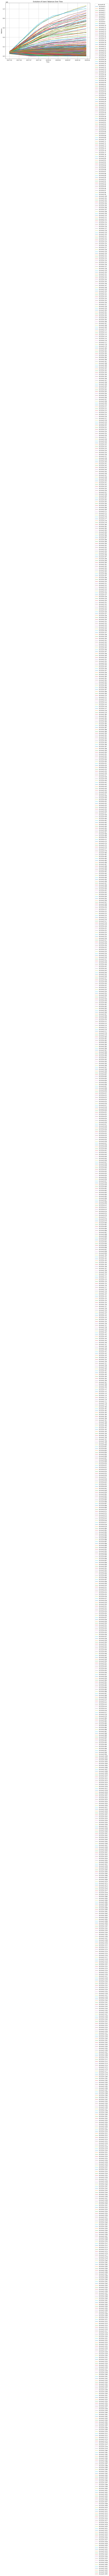

In [18]:
# Load the accounts and transactions data
accounts_df = pd.read_csv('sample/accounts.csv')
transactions_df = pd.read_csv('sample/transactions.csv')

# Convert tran_timestamp to datetime
transactions_df['tran_timestamp'] = pd.to_datetime(transactions_df['tran_timestamp'])

# Initialize a dictionary to store balance history for each account
balance_history = {acct_id: [] for acct_id in accounts_df['acct_id']}
timestamps = {acct_id: [] for acct_id in accounts_df['acct_id']}

# Initialize balances with the initial_deposit
balances = {acct_id: initial_deposit for acct_id, initial_deposit in zip(accounts_df['acct_id'], accounts_df['initial_deposit'])}

# Sort transactions by timestamp
transactions_df = transactions_df.sort_values(by='tran_timestamp')

# Process each transaction and update balances
for _, transaction in transactions_df.iterrows():
    orig_acct = transaction['orig_acct']
    bene_acct = transaction['bene_acct']
    base_amt = transaction['base_amt']
    tx_type = transaction['tx_type']
    timestamp = transaction['tran_timestamp']

    # Update the originator's balance
    if orig_acct in balances:
        if tx_type == 'TRANSFER' or tx_type == 'WITHDRAWAL':
            balances[orig_acct] -= base_amt
        elif tx_type == 'DEPOSIT':
            balances[orig_acct] += base_amt

        # Record the balance and timestamp for the originator
        balance_history[orig_acct].append(balances[orig_acct])
        timestamps[orig_acct].append(timestamp)

    # Update the beneficiary's balance
    if bene_acct in balances:
        if tx_type == 'TRANSFER' or tx_type == 'DEPOSIT':
            balances[bene_acct] += base_amt
        elif tx_type == 'WITHDRAWAL':
            balances[bene_acct] -= base_amt

        # Record the balance and timestamp for the beneficiary
        balance_history[bene_acct].append(balances[bene_acct])
        timestamps[bene_acct].append(timestamp)

# Plot the balance evolution for each account
plt.figure(figsize=(12, 8))
for acct_id in balance_history:
    if balance_history[acct_id]:  # Only plot accounts with transactions
        plt.plot(timestamps[acct_id], balance_history[acct_id], label=f'Account {acct_id}')

plt.title('Evolution of Users\' Balances Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.legend(title='Account ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()